Name:Niharika Nashine

Roll no:10



# Apply Shi-Tomasi corner detector

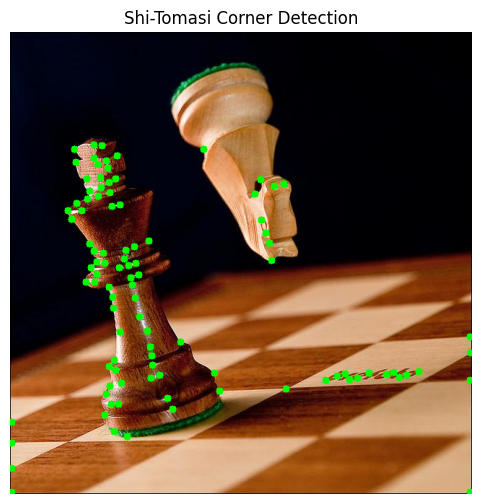

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "chess.jpeg"
img = cv2.imread(image_path)

if img is None:
    raise ValueError("Image not found. Check the file path.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)

if corners is not None:
    corners = corners.astype(int)


    for i in corners:
        x, y = i.ravel()
        cv2.circle(img, (x, y), 5, (0, 255, 0), -1)


    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Shi-Tomasi Corner Detection")
    plt.show()
else:
    print("No corners were detected.")



# RANSAC Algorithm

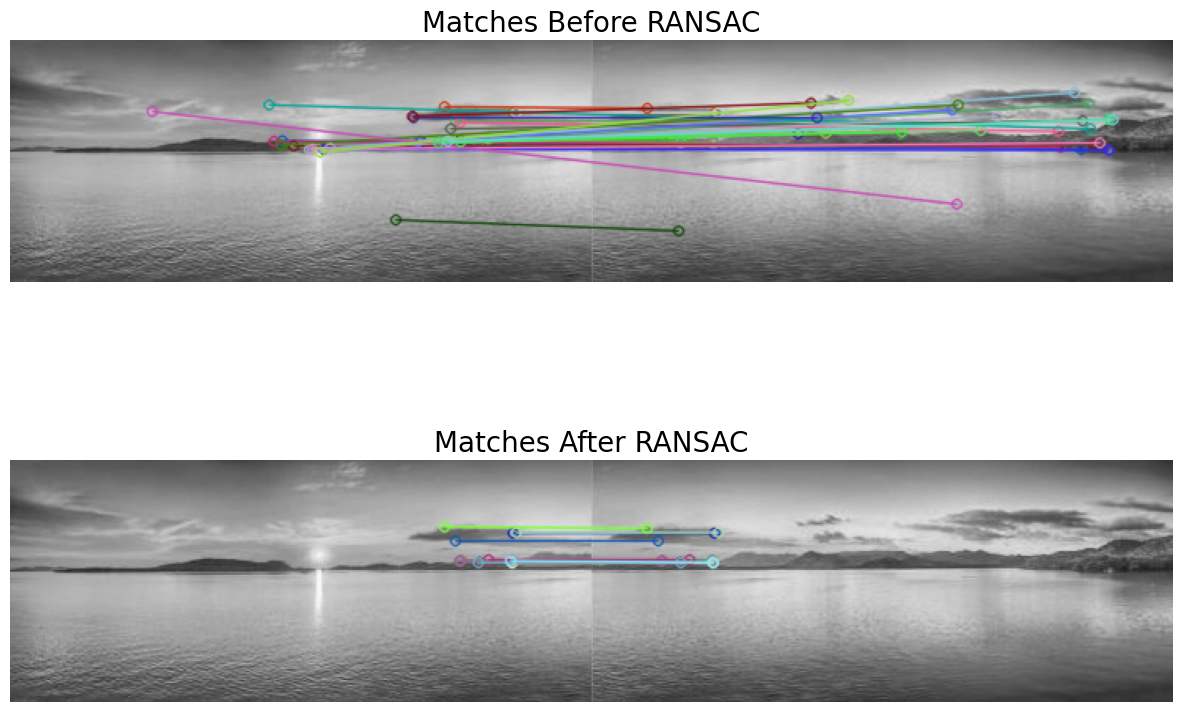

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread("panoo1.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with your image path
img2 = cv2.imread("panoo2.jpg", cv2.IMREAD_GRAYSCALE)  # Replace with your image path

if img1 is None or img2 is None:
    raise ValueError("One or both images not found. Check the file paths.")


orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

if des1 is None or des2 is None:
    raise ValueError("No descriptors found in one or both images.")


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)


matches = bf.match(des1, des2)


matches = sorted(matches, key=lambda x: x.distance)

if len(matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)


    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
else:
    print("Not enough matches found for RANSAC.")
    matchesMask = None

img_matches_before = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


if matchesMask is not None:
    img_matches_after = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, matchesMask=matchesMask, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    img_matches_after = img_matches_before

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.imshow(img_matches_before)
plt.title("Matches Before RANSAC", fontsize=20)
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(img_matches_after)
plt.title("Matches After RANSAC", fontsize=20)
plt.axis("off")

plt.show()




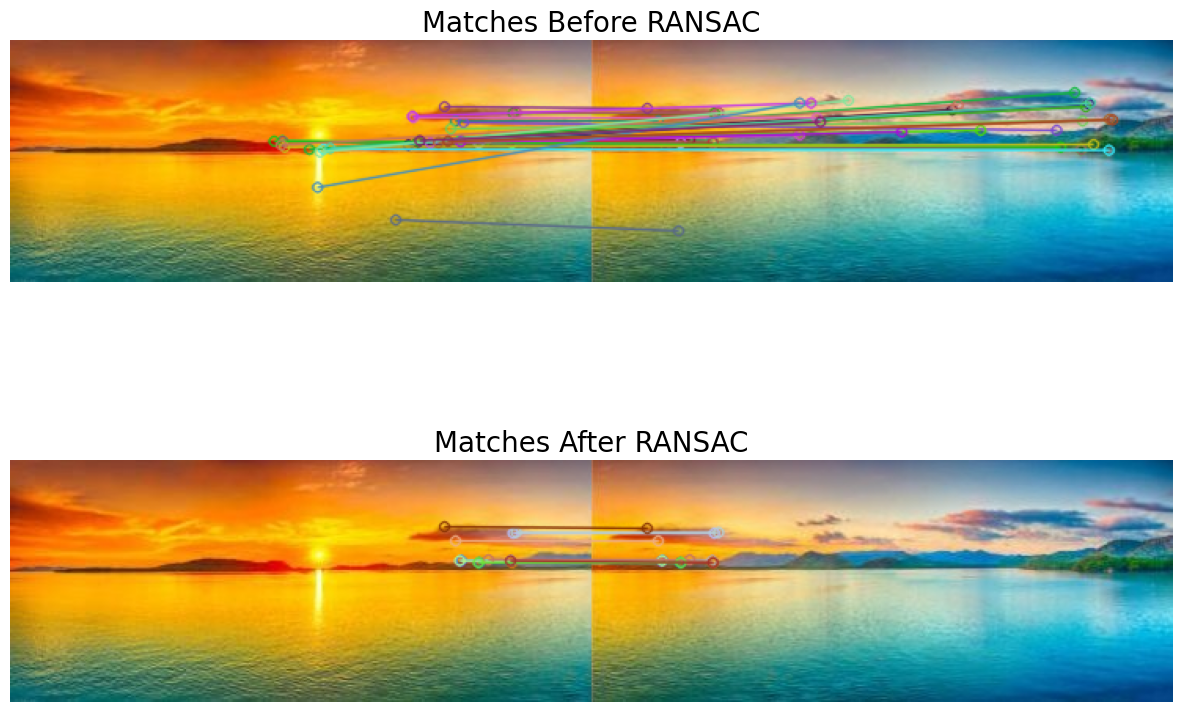

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1_color = cv2.imread("panoo1.jpg", cv2.IMREAD_COLOR)
img2_color = cv2.imread("panoo2.jpg", cv2.IMREAD_COLOR)


img1_gray = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)

if img1_gray is None or img2_gray is None:
    raise ValueError("One or both images not found. Check the file paths.")

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)

if des1 is None or des2 is None:
    raise ValueError("No descriptors found in one or both images.")

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1, des2)


matches = sorted(matches, key=lambda x: x.distance)

if len(matches) > 10:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)


    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
else:
    print("Not enough matches found for RANSAC.")
    matchesMask = None

img_matches_before = cv2.drawMatches(img1_color, kp1, img2_color, kp2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


if matchesMask is not None:
    img_matches_after = cv2.drawMatches(img1_color, kp1, img2_color, kp2, matches, None, matchesMask=matchesMask, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    img_matches_after = img_matches_before


img_matches_before_rgb = cv2.cvtColor(img_matches_before, cv2.COLOR_BGR2RGB)
img_matches_after_rgb = cv2.cvtColor(img_matches_after, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.imshow(img_matches_before_rgb)
plt.title("Matches Before RANSAC", fontsize=20)
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(img_matches_after_rgb)
plt.title("Matches After RANSAC", fontsize=20)
plt.axis("off")

plt.show()


# Applying SIFT with RANSAC

Number of good matches before RANSAC: 43


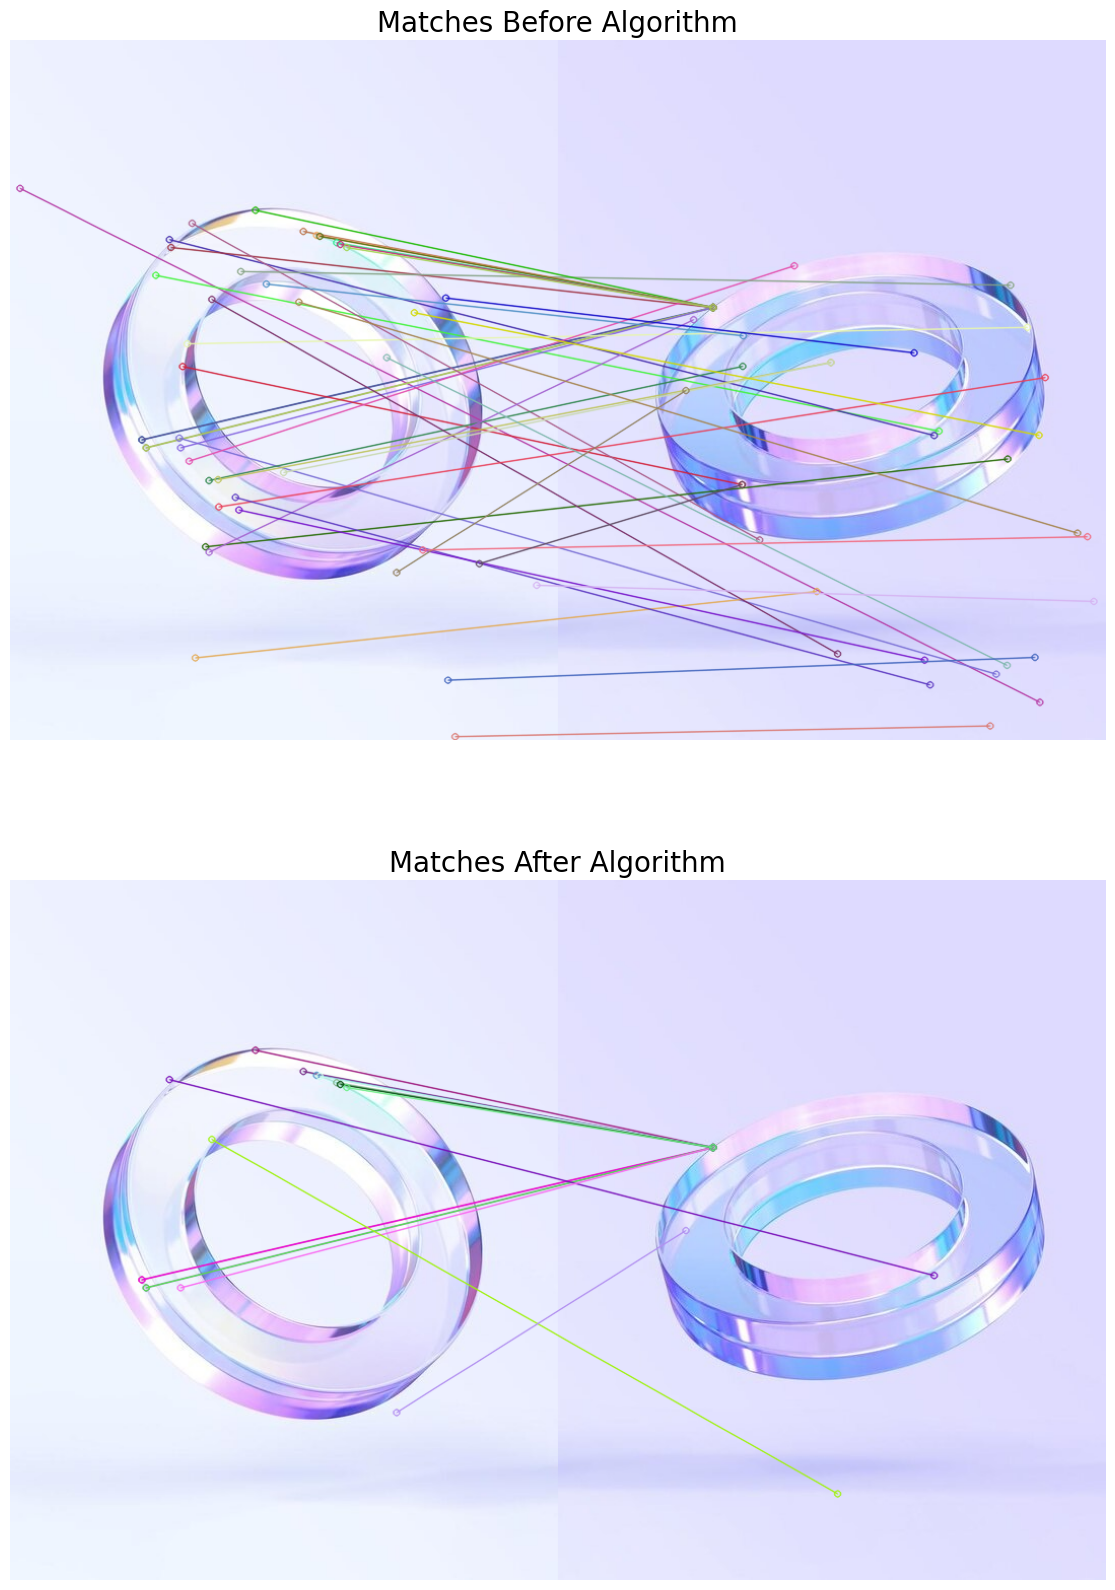

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1_color = cv2.imread("surf1.jpg")
img2_color = cv2.imread("surf2.jpg")

if img1_color is None or img2_color is None:
    raise ValueError("One or both images not found. Check the file paths.")

img1_gray = cv2.cvtColor(img1_color, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)

img1_gray = cv2.equalizeHist(img1_gray)
img2_gray = cv2.equalizeHist(img2_gray)


sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)

if des1 is None or des2 is None:
    raise ValueError("No descriptors found in one or both images.")

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_matches.append(m)


print(f"Number of good matches before RANSAC: {len(good_matches)}")

if len(good_matches) > 10:

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)


    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
else:
    print("Not enough matches for RANSAC.")
    matchesMask = None

img_matches_before = cv2.drawMatches(img1_color, kp1, img2_color, kp2, good_matches, None,
                                     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

if matchesMask is not None:
    img_matches_after = cv2.drawMatches(img1_color, kp1, img2_color, kp2, good_matches, None,
                                        matchesMask=matchesMask, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
else:
    img_matches_after = img_matches_before

img_matches_before_rgb = cv2.cvtColor(img_matches_before, cv2.COLOR_BGR2RGB)
img_matches_after_rgb = cv2.cvtColor(img_matches_after, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 20))

plt.subplot(2, 1, 1)
plt.imshow(img_matches_before_rgb)
plt.title("Matches Before Algorithm", fontsize=20)
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(img_matches_after_rgb)
plt.title("Matches After Algorithm", fontsize=20)
plt.axis("off")

plt.show()
